In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorlayer as tl
import torch.nn as nn

In [3]:
def get_gen(input_shape):
    w_init = tf.random_normal_initializer(stddev=0.02)
    g_init = tf.random_normal_initializer(1., 0.02)

    nin = tf.keras.layers.Input(input_shape)
    n = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init,activation='relu')(nin)
    temp=n

    # B residual blocks
    for i in range(16):
        nn = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init)(n)
        nn = tf.keras.layers.BatchNormalization(gamma_initializer=g_init)(nn)
        nn = tf.keras.activations.relu(nn)
        nn = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init)(nn)
        nn = tf.keras.layers.BatchNormalization(gamma_initializer=g_init)(nn)
        nn = tf.keras.layers.Add()([n, nn])
        n=nn

    n = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init,bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=g_init)(n)
    n = tf.keras.layers.Add()([n, temp])

    n = tf.keras.layers.Conv2D(256, (3,3), (1,1), padding='same', kernel_initializer=w_init)(n)
    n = tl.layers.SubpixelConv2d(scale=2, n_out_channels=None)(n)

    n = tf.keras.layers.Conv2D(256, (3,3), (1,1), padding='same', kernel_initializer=w_init)(n)
    n = tl.layers.SubpixelConv2d(scale=2, n_out_channels=None)(n)

    nn = tf.keras.layers.Conv2D(3, (1,1), (1,1), padding='same', kernel_initializer=w_init,activation='tanh')(n)
    generator = tf.keras.models.Model(inputs=nin, outputs=nn, name='generator')
    return generator

In [4]:
def get_Dis(input_shape):
    w_init = tf.random_normal_initializer(stddev=0.02)
    gamma_initializer = tf.random_normal_initializer(1., 0.02)
    df_dim = 64
    
    nin = tf.keras.layers.Input(input_shape)
    n = tf.keras.layers.Conv2D(df_dim, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU')(nin)

    n = tf.keras.layers.Conv2D(df_dim, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*2, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*2, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*4, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*4, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*8, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*8, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)

    n = tf.keras.layers.Flatten()(n)
    n = tf.keras.layers.Dense(1024, kernel_initializer=w_init,activation='LeakyReLU')(n)
    n = tf.keras.layers.Dense(1, kernel_initializer=w_init,activation='sigmoid')(n)
    discriminator = tf.keras.models.Model(inputs=nin, outputs=n, name='discriminator')
    return discriminator
    

In [5]:
def get_Dis2(input_shape):
    w_init = tf.random_normal_initializer(stddev=0.02)
    gamma_initializer = tf.random_normal_initializer(1., 0.02)
    df_dim = 64

    nin = tf.keras.layers.Input(input_shape)
    n = tf.keras.layers.Conv2D(df_dim, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU')(nin)

    n = tf.keras.layers.Conv2D(df_dim*2, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*4, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*8, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*16, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*32, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*16, (1,1), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*8, (1,1), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    nn = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)

    n = tf.keras.layers.Conv2D(df*2,(1,1),(1,1),padding='same',kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(nn)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*2,(3,3),(1,1),padding='same',kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*8,(3,3),(1,1),padding='same',kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Add()([nn,n])

    n = Flatten()(n)
    n = Dense(1,kernel_initializer=w_init,activation='LeakyReLU')(n)
    discriminator = tf.keras.models.Model(inputs=nin, outputs=n, name='discriminator')
    return discriminator

In [6]:
def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image)
    image = tf.cast(image, tf.float32)
    return image

def resize(image,height,width):
    image = tf.image.resize(image,[height,width],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image

def normalize(image):
    image = (image/127.5)-1
    return image

def random_crop(image):
    image = tf.image.random_crop(image,[384,384,3])
    return image

@tf.function
def random_jitter(image):
    image = resize(image,390,390)
    image = random_crop(image)

    if tf.random.uniform(())>0.5:
        image = tf.image.flip_left_right(image)
    return image

In [7]:
def load_image_train(image_file):
    image = load(image_file)
    image = random_jitter(image)
    image = normalize(image)
    return image

def load_image_test(image_file):
    image = load(image_file)
    image = resize(image,390,390)
    image = normalize(image)
    return image

In [59]:
LR = tf.data.Dataset.list_files(r'C:\Users\kc510\Documents\Projects\Projects_MLOps\Project_SuperResolution\data\train\LR'+'\\*.png',shuffle=False)
LR = LR.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
HR = tf.data.Dataset.list_files(r'C:\Users\kc510\Documents\Projects\Projects_MLOps\Project_SuperResolution\data\train\HR'+'\\*.png',shuffle=False)
HR = HR.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds = tf.data.Dataset.zip((LR,HR))
ds = ds.shuffle(buffer_size=800).batch(4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


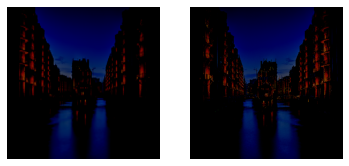

In [130]:
for inp,out in ds.take(1):
    display_list = [inp[0],out[0]]
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(display_list[i]*0.5)
        plt.axis('off')
    plt.show()

In [64]:
for n, (inp,out) in ds.enumerate():
    print(inp.shape,out.shape)
    break

(4, 384, 384, 3) (4, 384, 384, 3)


In [43]:
LAMBDA = 1e-3

In [44]:
def generator_loss(disc_generated_output,gen_output,target):
    valid = tf.ones_like(disc_generated_output)
    gan_loss = tf.keras.losses.MSE(valid,disc_generated_output)

    gen_features = feature_extractor(gen_output)
    real_features = feature_extractor(target)
    l1_loss = tf.reduce_mean(tf.abs(gen_features-real_features))

    total_gen_loss = gan_loss + (LAMBDA*l1_loss)

    return total_gen_loss,gan_loss,l1_loss

def discriminator_loss(disc_real_output,disc_generated_output):
    real_loss = tf.keras.losses.MSE(tf.ones_like(disc_real_output),disc_real_output)
    generated_loss = tf.keras.losses.MSE(tf.zeros_like(disc_generated_output),disc_generated_output)
    total_disc_loss = (real_loss + generated_loss) / 2
    return total_disc_loss
    

In [56]:
# criterion_GAN = nn.MSELoss()
# criterion_content = nn.L1Loss()

# Adversarial truth
from tensorflow.keras.applications.vgg19 import VGG19
vgg19_model = VGG19(weights='imagenet',include_top=False)
feature_extractor = tf.keras.models.Sequential(*[(vgg19_model.layers)[:18]])

In [ ]:
def gen_loss(disc_generated_output,target,output):
    valid = tf.ones_like(disc_generated_output)
    loss_gan = tf.keras.losses.MSE(valid,disc_generated_output)
    # Content loss
    gen_features = feature_extractor(output,training=True)
    real_features = feature_extractor(target,training=True)
    l1_loss = tf.reduce_mean(tf.abs(real_features-gen_features))

    total_gen_loss = loss_gan + 1e-3*l1_loss
    return total_gen_loss, loss_gan, l1_loss

def disc_loss(disc_real_output,disc_generated_output):
    real_loss = tf.keras.losses.MSE(tf.ones_like(disc_real_output),disc_real_output)
    generated_loss = tf.keras.losses.MSE(tf.zeros_like(disc_generated_output),disc_generated_output)
    total_disc_loss = (real_loss + generated_loss) / 2
    return total_disc_loss

In [57]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4,0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4,0.5)
def train(input_image,target,epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image,training=True)
        disc_real_output = discriminator(target,training=True) 
        disc_generated_output = discriminator(gen_output,training=True)
        gen_total_loss, gen_loss_gan, gen_loss_l1 = generator_loss(disc_generated_output,gen_output,target)
        disc_loss = discriminator_loss(disc_real_output,disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss,generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,discriminator.trainable_variables))

In [60]:
def fit(train_ds,epochs):
    for epoch in range(epochs):
        start = time.time()
        for n, (input_image,target) in train_ds.enumerate():
            print(".",end="")
            train(input_image,target,epoch)
            if n % 100 == 0:
                print()
        print()

        if(epoch+1)%5 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)
            generator.save()
            discriminator.save()
        
        print('Time taken for epoch {} is {} sec'.format(epoch+1,time.time()-start))

In [4]:
import time
generator = get_gen(input_shape=(384,384,3))
# discriminator = get_disc()
# fit(ds,5)

[TL] SubpixelConv2d  subpixelconv2d_1: scale: 2 act: No Activation


AttributeError: 'KerasTensor' object has no attribute '_info'